In [260]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score


In [261]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [262]:
train=pd.read_csv('/content/drive/MyDrive/Data/Train_data.csv')

In [263]:
train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [264]:
train.info()
#Here we can see that none of the column is null that is every column has some data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [265]:
train.describe()
#This gives me the description of the data such as there are 25192 records in the train data, mean etc.

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [266]:
train.describe(include='object')
#This gives me the classes which are having data type as 'object'.

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [267]:
train.shape
#This gives the shape as we can see there are 25192 rows and 42 columns.

(25192, 42)

In [268]:
train.isnull().sum()
#This should return 0 as there is not any null value in the dataset

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [269]:
#Checking for duplicate rows
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


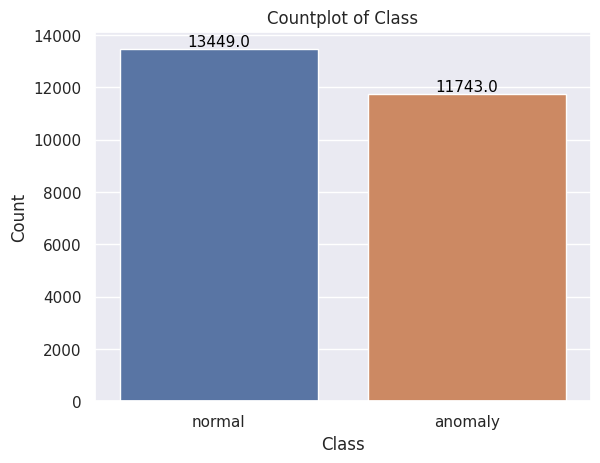

In [270]:
# Create the countplot
sns.set(style="darkgrid")
ax = sns.countplot(x="class", data=train)

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_title("Countplot of Class")

# Show the plot
plt.show()

In [271]:
print('Class distribution Training set:')
print(train['class'].value_counts())
#As we can see the dataset is not that much imbalanced

Class distribution Training set:
normal     13449
anomaly    11743
Name: class, dtype: int64


In [272]:
#Now as our dataset contains categorical values, we will convert them to numerical values using label encoding
def le(train):
    for col in train.columns:
        if train[col].dtype == 'object':
                label_encoder = LabelEncoder()
                train[col] = label_encoder.fit_transform(train[col])

le(train)



In [273]:
#now in our dataset we have this num_outbound_cmds column is there which is having a constant value which is 0.
#This column does not add any extra information so dropping this column
train.drop(['num_outbound_cmds'], axis=1, inplace=True)




In [274]:
train.head()
#As we can see the column number is reduced from 42 to 41
# 1 stands for normal and 0 stands for anomaly

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [275]:
X_train = train.drop(['class'], axis=1)# Features for training
y_train = train['class']#Target variable for training


In [276]:
# Label encoding for the target variable 'class'
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [277]:
# Standardize the features using MinMaxScaler
scaler = MinMaxScaler()  # Use MinMaxScaler for scaling
X_train = scaler.fit_transform(X_train)


In [278]:
# Compute the correlation matrix
correlation_matrix = pd.DataFrame(X_train).corr().abs()

# Extract the upper triangular part (excluding the diagonal)
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Find features with high correlation
high_correlation_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# Print the names of highly correlated features
print("Highly correlated feature names:", high_correlation_features)
X_train_high_correlation = X_train[high_correlation_features]


Highly correlated feature names: [15, 20, 24, 26, 32, 36, 37, 38, 39]


<ipython-input-278-d1ca22396383>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


In [279]:
# Split the data into training and testing sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

**Logistic Regression**

In [280]:
# Create and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_split, y_train_split)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [281]:
# Make predictions on the test set.
y_test_pred_lr= logreg_model.predict(X_test_split)

# Evaluate the model's performance.
accuracy_lr = accuracy_score(y_test_split, y_test_pred_lr)
precision_lr = precision_score(y_test_split, y_test_pred_lr)
recall_lr = recall_score(y_test_split, y_test_pred_lr)
f1_lr = f1_score(y_test_split, y_test_pred_lr)

print(f"Accuracy: {accuracy_lr}")
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

Accuracy: 0.9557451875372097
Precision: 0.9513812154696133
Recall: 0.9659685863874345
F1 Score: 0.958619409909074


**KNN**

In [282]:
knn = KNeighborsClassifier(3) # Define classifier
knn.fit(X_train_split, y_train_split) # Train model

# Make predictions
y_test_pred_knn = knn.predict(X_test_split)
accuracy_knn = accuracy_score(y_test_split, y_test_pred_knn) #
f1_knn = f1_score(y_test_split, y_test_pred_knn, average='weighted')
precision_knn = precision_score(y_test_split, y_test_pred_knn)
recall_knn = recall_score(y_test_split, y_test_pred_knn)
print(f"Accuracy: {accuracy_knn}")
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

Accuracy: 0.9908712046040881
Precision: 0.9917664670658682
Recall: 0.9910246821241586
F1 Score: 0.9908714261726578


**SVM**

In [283]:
svm_model = SVC()
svm_model.fit(X_train_split, y_train_split)
# Make predictions on the test set.
y_pred_svm = svm_model.predict(X_test_split)

# Evaluate the model's performance using accuracy.
accuracy_svm = accuracy_score(y_test_split, y_pred_svm)
f1_svm = f1_score(y_test_split, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test_split, y_pred_svm)
recall_svm = recall_score(y_test_split, y_pred_svm)
# Print the accuracy.
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)


Accuracy: 0.9785671760269895
Precision: 0.9769516728624535
Recall: 0.9827973074046372
F1 Score: 0.978562768404469


**Naive Bayes**

In [284]:
nb_model = GaussianNB()
nb_model.fit(X_train_split, y_train_split)

# Make predictions on the test set.
y_pred_nb = nb_model.predict(X_test_split)

# Evaluate the model's performance.
accuracy_nb = accuracy_score(y_test_split, y_pred_nb)
precision_nb = precision_score(y_test_split, y_pred_nb)
recall_nb = recall_score(y_test_split, y_pred_nb)
f1_nb = f1_score(y_test_split, y_pred_nb)
# Print the accuracy.
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)

Accuracy: 0.9009724151617384
Precision: 0.9026286560533135
Recall: 0.9117427075542259
F1 Score: 0.9071627906976744


**Random Forest**

In [285]:
rf = RandomForestClassifier(n_estimators=10) # Define classifier
rf.fit(X_train_split, y_train_split) # Train model

# Make predictions
y_pred_rf = rf.predict(X_test_split)

# Test set performance
accuracy_rf = accuracy_score(y_test_split, y_pred_rf)
precision_rf = precision_score(y_test_split, y_pred_rf)
recall_rf = recall_score(y_test_split, y_pred_rf)
f1_rf = f1_score(y_test_split, y_pred_rf)
# Print the accuracy.
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Accuracy: 0.9958325064496923
Precision: 0.9958878504672897
Recall: 0.9962602842183994
F1 Score: 0.9960740325294447


**Decision Tree**

In [286]:
# Create and train the Decision Tree classifier.
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_split, y_train_split)

# Make predictions on the test set.
y_pred_dt = dt_model.predict(X_test_split)

# Evaluate the model's performance.
accuracy_dt = accuracy_score(y_test_split, y_pred_dt)
precision_dt = precision_score(y_test_split, y_pred_dt)
recall_dt = recall_score(y_test_split, y_pred_dt)
f1_dt = f1_score(y_test_split, y_pred_dt)

# Print the accuracy.
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)




Accuracy: 0.9934510815638024
Precision: 0.9951256092988376
Recall: 0.9925205684367988
F1 Score: 0.9938213817637146


In [287]:
# Define base learners

base_learners = [
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('nb', GaussianNB())
]

In [288]:
# Initialize stacking classifier with Logistic Regression as the meta-learner
from sklearn.ensemble import StackingClassifier
stacking_classifier = StackingClassifier(
    estimators=base_learners,
    final_estimator=RandomForestClassifier()
)

In [289]:
# Train the stacking classifier on the smaller training set
stacking_classifier.fit(X_train_split, y_train_split)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('dt', DecisionTreeClassifier()),
                               ('svm', SVC(probability=True)),
                               ('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('nb', GaussianNB())],
                   final_estimator=RandomForestClassifier())

In [290]:
# Make predictions
y_pred_stacked_model = stacking_classifier.predict(X_test_split)

In [291]:
# Save the trained model to a file
import joblib
joblib.dump(stacking_classifier, 'stacking_classifier.pkl')

['stacking_classifier.pkl']

In [292]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test_split, y_pred_stacked_model)
recall = recall_score(y_test_split, y_pred_stacked_model)
f1 = f1_score(y_test_split, y_pred_stacked_model)

# Print precision, recall, and F1 score
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")
# Evaluate the performance of the stacking classifier on the validation set
accuracy = accuracy_score(y_test_split, y_pred_stacked_model)
print(f"Validation Accuracy: {accuracy:.5f}")



Precision: 0.99701
Recall: 0.99663
F1 Score: 0.99682
Validation Accuracy: 0.99663


In [293]:
#Making a table of the results
data = {
    "Classifiers": ["Random Forest", "KNN", "Decision Tree", "SVM","Naive Bayes","Logistic Regression","Stacked Model"],
    "Precision": [precision_rf,precision_knn, precision_dt, precision_svm,precision_nb,precision_lr,precision],
    "Recall":[recall_rf,recall_knn,recall_dt,recall_svm,recall_nb,recall_lr,recall],
    "F1_score":[f1_rf,f1_knn,f1_dt,f1_svm,f1_nb,f1_lr,f1],
    "Accuracy": [accuracy_rf,accuracy_knn,accuracy_dt,accuracy_svm,accuracy_nb,accuracy_lr,accuracy]
    }

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


           Classifiers  Precision    Recall  F1_score  Accuracy
0        Random Forest   0.995888  0.996260  0.996074  0.995833
1                  KNN   0.991766  0.991025  0.990871  0.990871
2        Decision Tree   0.995126  0.992521  0.993821  0.993451
3                  SVM   0.976952  0.982797  0.978563  0.978567
4          Naive Bayes   0.902629  0.911743  0.907163  0.900972
5  Logistic Regression   0.951381  0.965969  0.958619  0.955745
6        Stacked Model   0.997007  0.996634  0.996821  0.996626


In [294]:
#Build Confusion Matrix
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
confusion = confusion_matrix(y_test_split, y_pred_stacked_model)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[2357    8]
 [   9 2665]]


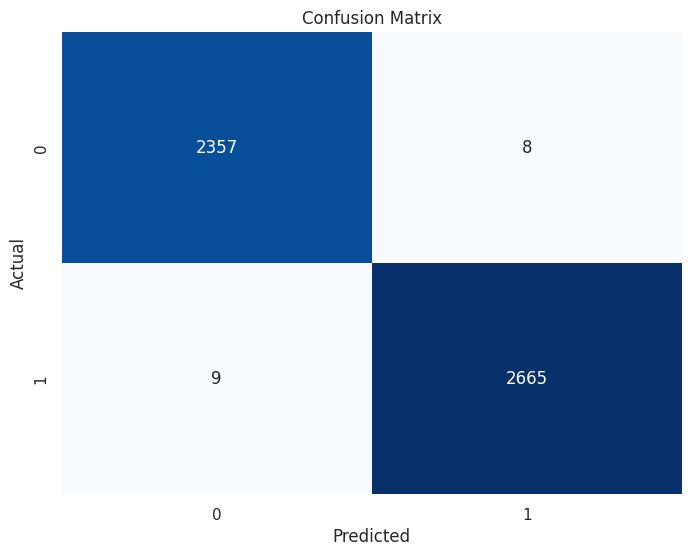

In [295]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [296]:
#Now our trained and validated model is ready we can use this model on any dataset.
